In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/drive/MyDrive/LSMS - Research Project/Identify Diseases/Cardiovascular/Cardiovascular.csv'
df = pd.read_csv(file_path)

In [3]:
# Display basic information
print(df.head())

   Age Gender  BMI  Cholesterol  Triglyceride     HDL     LDL  \
0   50      F   24      162.414        79.713  92.808  54.138   
1   26      M   23      143.079       123.998  42.537  81.207   
2   33      M   21      189.483        88.570  30.936  77.340   
3   45      F   21      112.143        88.570  38.670  58.005   
4   50      F   24      139.212       115.141  34.803  81.207   

      Cardiovascular  
0  No Cardiovascular  
1  No Cardiovascular  
2  No Cardiovascular  
3  No Cardiovascular  
4  No Cardiovascular  


In [4]:
print(df['Gender'].unique())

['F' 'M' 'f']


In [5]:
df['Gender'] = df['Gender'].replace({"M": 1, "F": 0, "f": 0}).astype(int)

In [6]:
# Display basic information
print(df.head())

   Age  Gender  BMI  Cholesterol  Triglyceride     HDL     LDL  \
0   50       0   24      162.414        79.713  92.808  54.138   
1   26       1   23      143.079       123.998  42.537  81.207   
2   33       1   21      189.483        88.570  30.936  77.340   
3   45       0   21      112.143        88.570  38.670  58.005   
4   50       0   24      139.212       115.141  34.803  81.207   

      Cardiovascular  
0  No Cardiovascular  
1  No Cardiovascular  
2  No Cardiovascular  
3  No Cardiovascular  
4  No Cardiovascular  


In [7]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Cholesterol', 'Triglyceride', 'HDL', 'LDL',
       'Cardiovascular'],
      dtype='object')

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5132 non-null   int64  
 1   Gender          5132 non-null   int64  
 2   BMI             5132 non-null   int64  
 3   Cholesterol     5132 non-null   float64
 4   Triglyceride    5132 non-null   float64
 5   HDL             5132 non-null   float64
 6   LDL             5132 non-null   float64
 7   Cardiovascular  5132 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 320.9+ KB
None


In [9]:
print(df.shape)

(5132, 8)


In [10]:
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Cholesterol,0
Triglyceride,0
HDL,0
LDL,0
Cardiovascular,0


In [11]:
df["Cardiovascular"].unique()

array(['No Cardiovascular', 'Cardiovascular'], dtype=object)

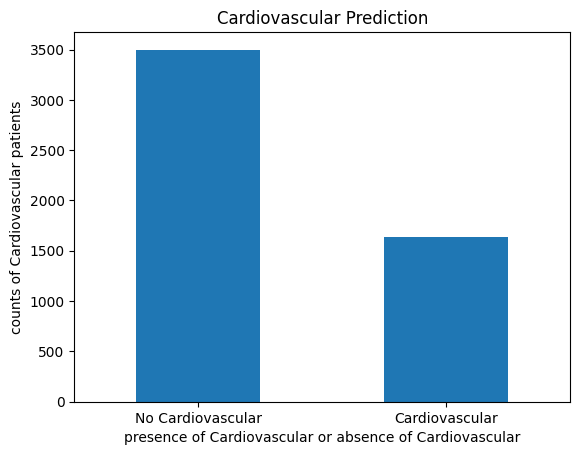

In [12]:
df["Cardiovascular"].value_counts().plot.bar()
plt.title("Cardiovascular Prediction")
plt.xlabel("presence of Cardiovascular or absence of Cardiovascular")
plt.ylabel("counts of Cardiovascular patients")
plt.xticks(rotation=0)
plt.show()

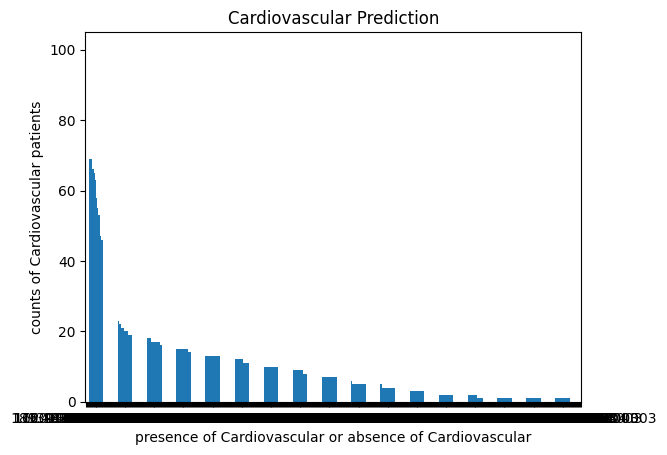

In [13]:
df["Cholesterol"].value_counts().plot.bar()
plt.title("Cardiovascular Prediction")
plt.xlabel("presence of Cardiovascular or absence of Cardiovascular")
plt.ylabel("counts of Cardiovascular patients")
plt.xticks(rotation=0)
plt.show()

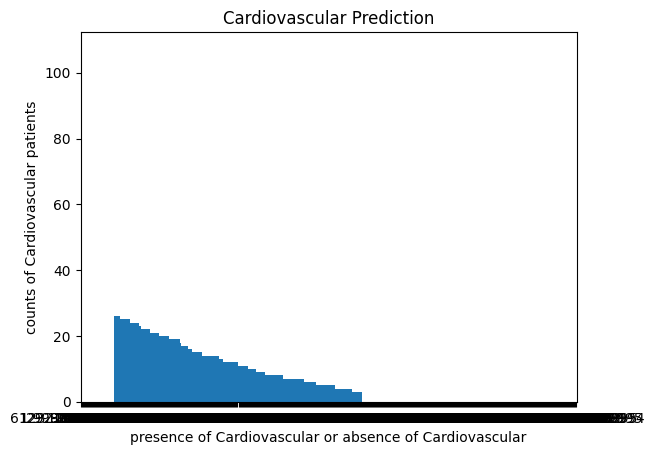

In [14]:
df["Triglyceride"].value_counts().plot.bar()
plt.title("Cardiovascular Prediction")
plt.xlabel("presence of Cardiovascular or absence of Cardiovascular")
plt.ylabel("counts of Cardiovascular patients")
plt.xticks(rotation=0)
plt.show()

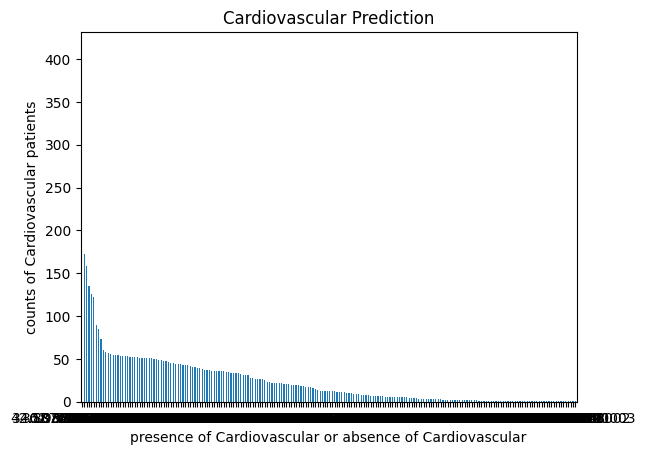

In [15]:
df["HDL"].value_counts().plot.bar()
plt.title("Cardiovascular Prediction")
plt.xlabel("presence of Cardiovascular or absence of Cardiovascular")
plt.ylabel("counts of Cardiovascular patients")
plt.xticks(rotation=0)
plt.show()

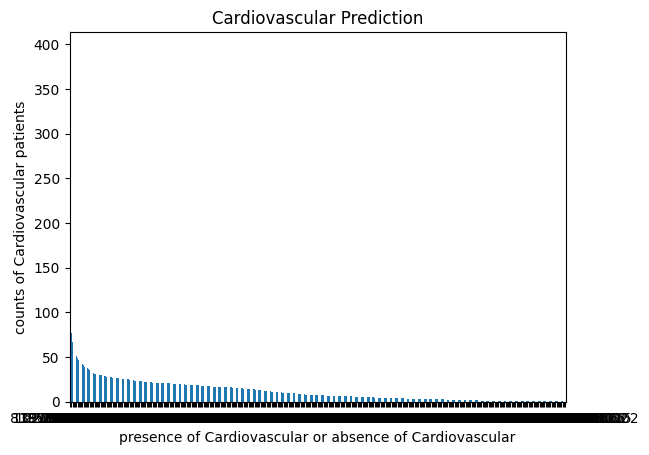

In [16]:
df["LDL"].value_counts().plot.bar()
plt.title("Cardiovascular Prediction")
plt.xlabel("presence of Cardiovascular or absence of Cardiovascular")
plt.ylabel("counts of Cardiovascular patients")
plt.xticks(rotation=0)
plt.show()

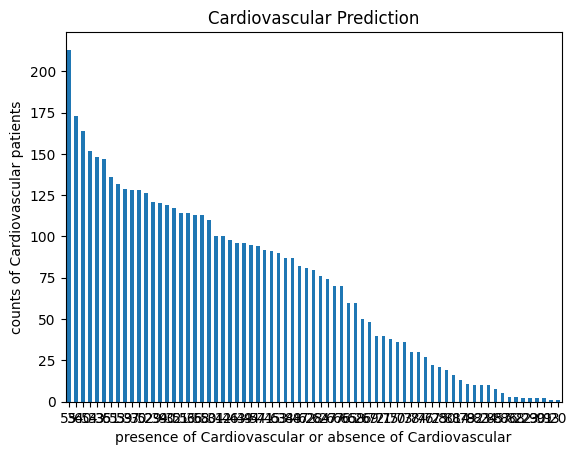

In [17]:
df["Age"].value_counts().plot.bar()
plt.title("Cardiovascular Prediction")
plt.xlabel("presence of Cardiovascular or absence of Cardiovascular")
plt.ylabel("counts of Cardiovascular patients")
plt.xticks(rotation=0)
plt.show()

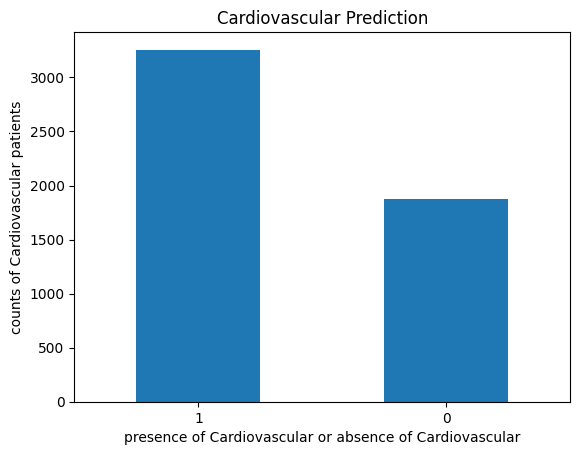

In [18]:
df["Gender"].value_counts().plot.bar()
plt.title("Cardiovascular Prediction")
plt.xlabel("presence of Cardiovascular or absence of Cardiovascular")
plt.ylabel("counts of Cardiovascular patients")
plt.xticks(rotation=0)
plt.show()

In [19]:
X=df[["Age", "Gender", "BMI", "Cholesterol" ,"Triglyceride","HDL","LDL"]]

In [20]:
X.head()

,Age,Gender,BMI,Cholesterol,Triglyceride,HDL,LDL
0,50,0,24,162.414,79.713,92.808,54.138
1,26,1,23,143.079,123.998,42.537,81.207
2,33,1,21,189.483,88.570,30.936,77.340
3,45,0,21,112.143,88.570,38.670,58.005
4,50,0,24,139.212,115.141,34.803,81.207


In [21]:
Y=df[["Cardiovascular"]]

In [22]:
Y.head()

,Cardiovascular
0,No Cardiovascular
1,No Cardiovascular
2,No Cardiovascular
3,No Cardiovascular
4,No Cardiovascular


In [23]:
# Prepare dataset for training
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.40,random_state=25)

In [24]:
x_train.shape

(3079, 7)

In [25]:
y_train.shape

(3079, 1)

In [26]:
x_test.shape

(2053, 7)

In [27]:
y_test.shape

(2053, 1)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='sqrt', n_estimators=200)
rf.fit(x_train, y_train)
rf_score = rf.score(x_test, y_test) * 100
print(f"Random Forest Classifier Accuracy : {rf_score:.2f}%")

Random Forest Classifier Accuracy : 100.00%


In [29]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=0,max_iter=3000)
lr.fit(x_train, y_train)
lr_score=lr.score(x_test,y_test)*100
print(f"LogisticRegression Accuracy : {lr_score:.2f}%")

LogisticRegression Accuracy : 93.08%


In [30]:
from sklearn.svm import SVC

svc = SVC()  # Initialize SVC
svc.fit(x_train, y_train)  # Train the model
svc_score = svc.score(x_test, y_test) * 100  # Calculate accuracy
print(f"SVC Accuracy: {svc_score:.2f}%")

SVC Accuracy: 97.22%


In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  # Initialize KNN
knn.fit(x_train, y_train)  # Train the model
knn_score = knn.score(x_test, y_test) * 100  # Calculate accuracy
print(f"KNN Accuracy: {knn_score:.2f}%")

KNN Accuracy: 97.71%


In [32]:
from sklearn.tree import DecisionTreeClassifier

dc=DecisionTreeClassifier()
dc.fit(x_train, y_train)
dc_score=dc.score(x_test,y_test)*100
print(f"Decision Tree Classifier Accuracy: {dc_score:.2f}%")

Decision Tree Classifier Accuracy: 100.00%


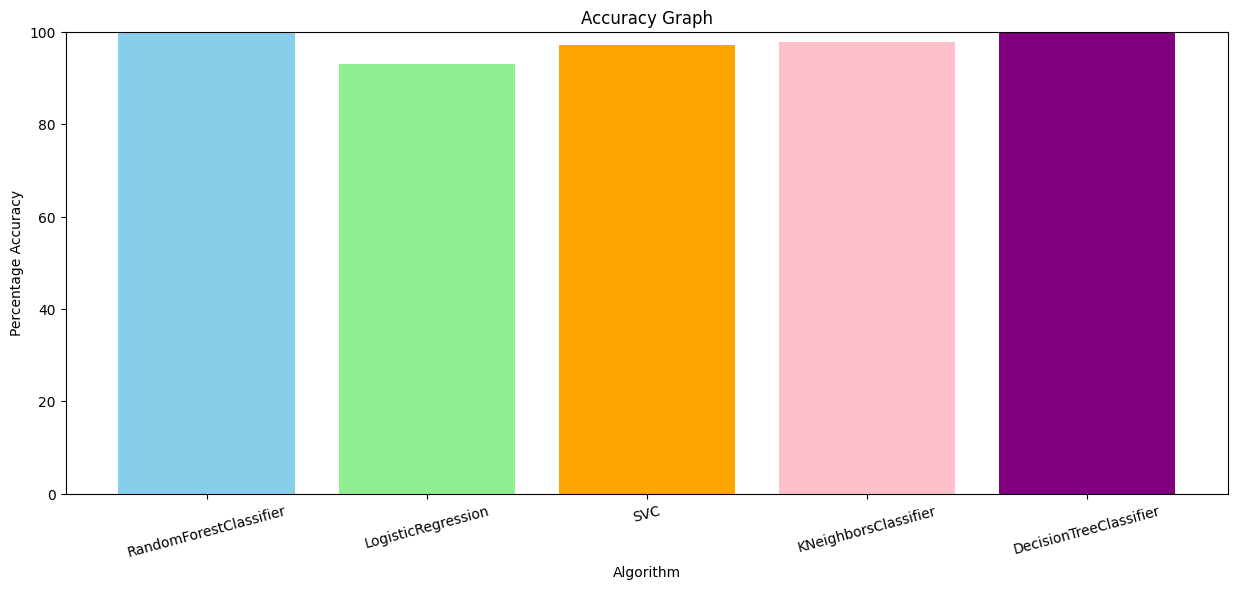

In [33]:
a = ["RandomForestClassifier", "LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier"]
b = [rf_score, lr_score, svc_score, knn_score, dc_score]

# Define a list of colors
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'purple']

plt.figure(figsize=(15, 6))
plt.bar(a, b, color=colors)  # Pass the color list
plt.title("Accuracy Graph")
plt.xlabel("Algorithm")
plt.ylabel("Percentage Accuracy")
plt.ylim(0, 100)  # Ensure y-axis limits show percentages properly
plt.xticks(rotation=15)
plt.show()

In [34]:
# Find the best model based on accuracy
scores = [rf_score, lr_score, svc_score, knn_score, dc_score]
models = ["RandomForestClassifier", "LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier"]

# Identify the best model
best_model_name = models[scores.index(max(scores))]
print(f"Best model based on accuracy: {best_model_name}")

Best model based on accuracy: RandomForestClassifier


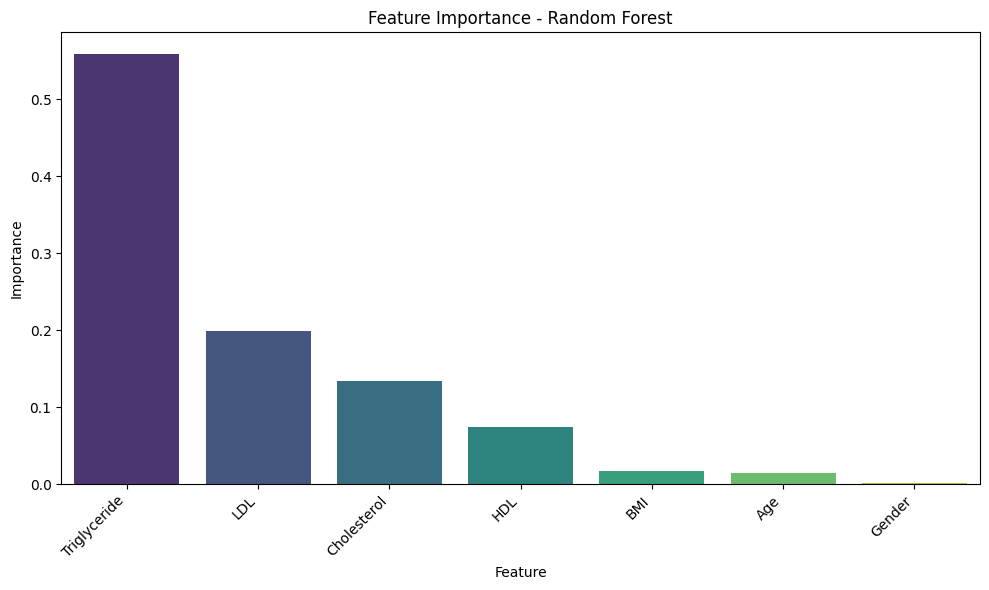

In [35]:
# Ensure feature_importance and feature names are aligned
feature_importance = rf.feature_importances_
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Feature', y='Importance', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
# Save the best model to a file
joblib.dump(rf, 'cardiovascular_model_v2.joblib')
print("Best model saved as 'best_cardiovascular_model.joblib'.")

Best model saved as 'best_cardiovascular_model.joblib'.


In [37]:
# Display basic information
print(df.tail())

      Age  Gender  BMI  Cholesterol  Triglyceride      HDL       LDL  \
5127   54       1   23     193.3500      132.8550  47.9508  115.2366   
5128   50       0   22     168.9879      185.1113  52.9779   88.5543   
5129   67       1   24     150.4263      122.2266  44.0838   83.9139   
5130   60       0   29     228.5397      114.2553  66.8991  110.2095   
5131   37       1   34     209.5914      235.5962  41.7636  110.9829   

         Cardiovascular  
5127  No Cardiovascular  
5128  No Cardiovascular  
5129  No Cardiovascular  
5130  No Cardiovascular  
5131     Cardiovascular  


In [38]:
result=rf.predict([[26,1,23,143.07,123.98,42.53,81.2]])

In [39]:
result

array(['No Cardiovascular'], dtype=object)

In [40]:
result_percentage=rf.predict_proba([[26,1,23,143.07,123.98,42.53,81.2]])

In [41]:
result_percentage*100

array([[  0., 100.]])

In [42]:
max(result_percentage[0])

1.0

In [43]:
max(result_percentage[0])*100

100.0

In [44]:
round(max(result_percentage[0])*100,2)

100.0

In [45]:
print(round(max(result_percentage[0])*100,2),"presence of",result[0])

100.0 presence of No Cardiovascular


In [46]:
def predict_cardiovascular():
    # Collect user inputs
    gender = float(input("Enter gender (Male=1, Female=0): "))
    age = float(input("Enter age: "))
    bmi = float(input("Enter BMI: "))
    cholesterol = float(input("Enter cholesterol level (mg/dL): "))
    triglyceride = float(input("Enter triglyceride level (mg/dL): "))
    hdl = float(input("Enter HDL level (mg/dL): "))
    ldl = float(input("Enter LDL level (mg/dL): "))

    # Create input array
    input_features = [[age, gender, bmi, cholesterol, triglyceride, hdl, ldl]]

    # Mock-up predictions (replace these with the actual model's predictions)
    result = rf.predict(input_features)  # Example: ["cardiovascular"]
    result_percentage = rf.predict_proba(input_features)  # Example: [[0.35, 0.65]]

    # Extract confidence percentage
    confidence_percentage = round(max(result_percentage[0]) * 100, 2)

    # Display results
    print(f"{confidence_percentage}% it is {result[0]}")

# Call the function
predict_cardiovascular()


Enter gender (Male=1, Female=0): 1
Enter age: 42
Enter BMI: 24
Enter cholesterol level (mg/dL): 239.7
Enter triglyceride level (mg/dL): 88.57
Enter HDL level (mg/dL): 42.53
Enter LDL level (mg/dL): 177.88
94.0% it is Cardiovascular


In [47]:
import numpy as np

def predict_cardiovascular_with_probability(model, age, gender, bmi, cholesterol, triglyceride, hdl, ldl):
    """
    Predicts whether a patient has cardiovascular disease or not and provides the probability of each outcome.

    Parameters:
    - model: Trained classification model (e.g., RandomForestClassifier).
    - age (float): Age of the patient.
    - gender (str): Gender ("Male", "Female", or "Other").
    - bmi (float): Body Mass Index (BMI).
    - cholesterol (float): Cholesterol level.
    - triglyceride (float): Triglyceride level.
    - hdl (float): HDL level.
    - ldl (float): LDL level.

    Returns:
    - Prediction (str): "No Cardiovascular Disease" or "Cardiovascular Disease".
    - Probabilities (dict): Probability percentages for each class.
    """
    # Gender encoding
    gender_mapping = {"Male": 1, "Female": 0, "Other": 2}
    if gender not in gender_mapping:
        raise ValueError(f"Invalid gender: {gender}. Must be one of {list(gender_mapping.keys())}.")
    gender_encoded = gender_mapping[gender]

    # Prepare input as a 2D array for the model
    input_data = np.array([[age, gender_encoded, bmi, cholesterol, triglyceride, hdl, ldl]])

    # Make prediction and get probabilities
    prediction = model.predict(input_data)[0]
    probabilities = model.predict_proba(input_data)

    # Map prediction to label
    prediction_label = "No Cardiovascular Disease" if prediction == 0 else "Cardiovascular Disease"

    # Map probabilities to human-readable format
    probabilities_dict = round(max(probabilities[0]) * 100, 2)


    return prediction_label, probabilities_dict

# Example usage:
# Assuming `cardiovascular_model` is the trained classifier
result, probabilities = predict_cardiovascular_with_probability(
    rf,
    age=45,
    gender="Female",
    bmi=60,
    cholesterol=100,
    triglyceride=200,
    hdl=150,
    ldl=70
)
print(f"Prediction: {result}")
print(f"Probabilities: {probabilities}")


Prediction: Cardiovascular Disease
Probabilities: 66.0
